## 1. Introduce

### Problem Statement
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read csv file and take a look at it
train = pd.read_csv('./train.csv')

In [4]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0] 
columns = train.shape[1] 
print("The train dataset contains {} rows and {} columns".format(rows, columns))

The train dataset contains 614 rows and 13 columns


### Dataset description

Variable

Loan_ID:   Unique Loan ID

Gender:    Male/ Female

Married:   Applicant married (Y/N)

Dependents:Number of dependents

Education: Applicant Education (Graduate/ Under Graduate)

Self_Employed: Self employed (Y/N)

ApplicantIncome: Applicant income

CoapplicantIncome: Coapplicant income

LoanAmount:  Loan amount in thousands

Loan_Amount_Term: Term of loan in months

Credit_History: credit history meets guidelines

Property_Area: Urban/ Semi Urban/ Rural

Loan_Status: Loan approved (Y/N)

# 2. Data exploration and visualization

### Null or Missing value tracking 

Let check whether there are any null values in the train dataset

In [7]:
train.isnull().values.any()

True

In [8]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

In [9]:
# List null columns name
# Hint: isnull()
# Your code here
train_copy.isnull().sum()[train_copy.isnull().any()].sort_values()

Married              3
Gender              13
Loan_Amount_Term    14
Dependents          15
LoanAmount          22
Self_Employed       32
Credit_History      50
dtype: int64

### Data exploratory analysis

#### Univariate analysis

##### Continuous Variables

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


##### Categorical variables

#### Bivariate analysis

#### Continuous vs Continuous

In [11]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

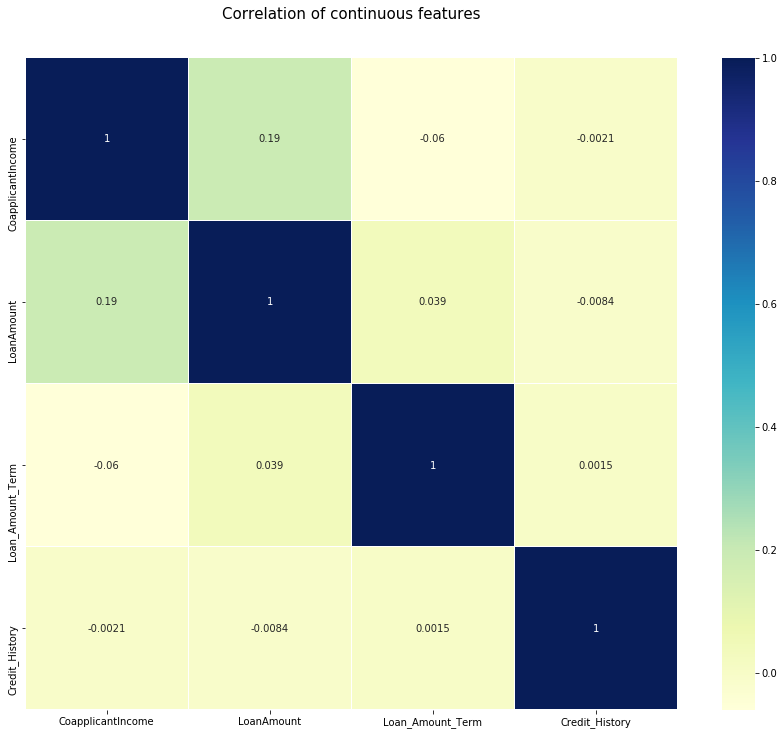

In [12]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap="YlGnBu",annot=True)
plt.show()

#### Categorical vs Categorical

In [13]:
#Stacked bar chart: Loan Status vs Each other categorical variable 

In [44]:
# Loan Status vs Gender
train['Gender'].value_counts()
# % impact of gender to Loan Status
gender_M = train[train['Gender'] == "Male"]['Loan_Status'].value_counts()
gender_F = train[train['Gender'] == "Female"]['Loan_Status'].value_counts()
number_of_gender_male = gender_M/train['Loan_Status'].shape[0]*100
number_of_gender_female = gender_F/train['Loan_Status'].shape[0]*100
print('Loan Status vs Gender')
print(number_of_gender_male)
print(number_of_gender_female)
print('=====================================')

# Loan Status vs Married
train['Married'].value_counts()
# % impact of Married to Loan Status
married_Y = train[train['Married'] == "Yes"]['Loan_Status'].value_counts()
married_N = train[train['Married'] == "No"]['Loan_Status'].value_counts()
number_of_married_Y = married_Y/train['Loan_Status'].shape[0]*100
number_of_married_N = married_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Married')
print(number_of_married_Y)
print(number_of_married_N)
print('=====================================')

# Loan Status vs Education
Education_Y = train[train['Education'] == "Graduate"]['Loan_Status'].value_counts()
Education_N = train[train['Education'] == "Not Graduate"]['Loan_Status'].value_counts()
number_of_Education_Y = Education_Y/train['Loan_Status'].shape[0]*100
number_of_Education_N = Education_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Education')
print(number_of_Education_Y)
print(number_of_Education_N)
print('=====================================')

# Loan Status vs Self_Employed
Self_Employed_Y = train[train['Self_Employed'] == "Yes"]['Loan_Status'].value_counts()
Self_Employed_N = train[train['Self_Employed'] == "No"]['Loan_Status'].value_counts()
number_of_Self_Employed_Y = Self_Employed_Y/train['Loan_Status'].shape[0]*100
number_of_Self_Employed_N = Self_Employed_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Self_Employed')
print(number_of_Self_Employed_Y)
print(number_of_Self_Employed_N)
print('=====================================')


# Loan Status vs Dependents
Dependents_Y = train[train['Dependents'] != "0"]['Loan_Status'].value_counts()
Dependents_N = train[train['Dependents'] == "0"]['Loan_Status'].value_counts()
number_of_Dependents_Y = Dependents_Y/train['Loan_Status'].shape[0]*100
number_of_Dependents_N = Dependents_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Dependents')
print(number_of_Dependents_Y)
print(number_of_Dependents_N)



Loan Status vs Gender
Y    55.211726
N    24.429967
Name: Loan_Status, dtype: float64
Y    12.214984
N     6.026059
Name: Loan_Status, dtype: float64
Loan Status vs Married
Y    46.416938
N    18.403909
Name: Loan_Status, dtype: float64
Y    21.824104
N    12.866450
Name: Loan_Status, dtype: float64
Loan Status vs Education
Y    55.374593
N    22.801303
Name: Loan_Status, dtype: float64
Y    13.355049
N     8.469055
Name: Loan_Status, dtype: float64
Loan Status vs Self_Employed
Y    9.120521
N    4.234528
Name: Loan_Status, dtype: float64
Y    55.863192
N    25.570033
Name: Loan_Status, dtype: float64
Loan Status vs Dependents
Y    29.967427
N    13.843648
Name: Loan_Status, dtype: float64
Y    38.762215
N    17.426710
Name: Loan_Status, dtype: float64


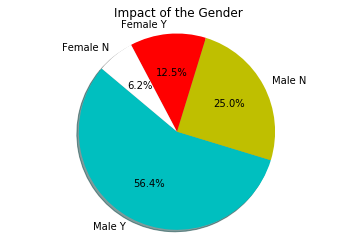

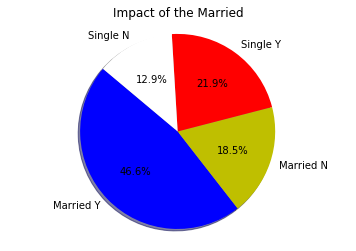

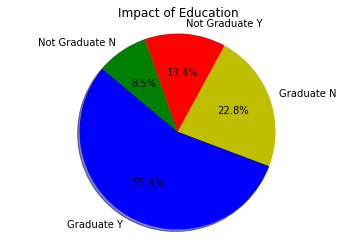

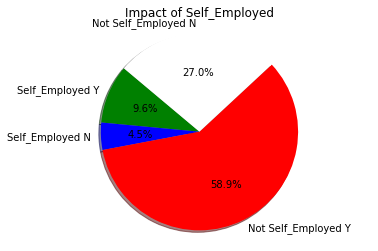

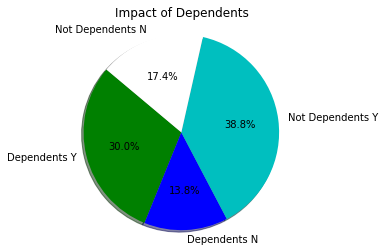

In [45]:

# Pie chart Loan Status vs Gender
labels = ['Male Y', 'Male N', 'Female Y', 'Female N']
sizes = [55.211726,24.429967,12.214984, 6.026059]
cols = ['c','y','r','w']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of the Gender')
plt.show()

# Pie chart Loan Status vs Married
labels = ['Married Y', 'Married N', 'Single Y', 'Single N']
sizes = [46.416938,18.403909,21.824104, 12.866450]
cols = ['b','y','r','w']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of the Married')
plt.show()

# Pie chart Loan Status vs Graduate
labels = ['Graduate Y', 'Graduate N', 'Not Graduate Y', 'Not Graduate N']
sizes = [55.374593,22.801303,13.355049, 8.469055]
cols = ['b','y','r','g']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of Education')
plt.show()

# Pie chart Loan Status vs Self_Employed
labels = ['Self_Employed Y', 'Self_Employed N', 'Not Self_Employed Y', 'Not Self_Employed N']
sizes = [9.120521,4.234528,55.863192, 25.570033]
cols = ['g','b','r','w']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of Self_Employed')
plt.show()

# Pie chart Loan Status vs Dependents

labels = ['Dependents Y', 'Dependents N', 'Not Dependents Y', 'Not Dependents N']
sizes = [29.967427,13.843648,38.762215,17.426710]
cols = ['g','b','c','w']
explode = (0.1, 0, 0, 0)
plt.pie(sizes,labels=labels,colors=cols,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Impact of Dependents')
plt.show()


Y    55.374593
N    22.801303
Name: Loan_Status, dtype: float64
Y    13.355049
N     8.469055
Name: Loan_Status, dtype: float64


In [43]:

Dependents_Y = train[train['Dependents'] != "0"]['Loan_Status'].value_counts()
Dependents_N = train[train['Dependents'] == "0"]['Loan_Status'].value_counts()
number_of_Dependents_Y = Dependents_Y/train['Loan_Status'].shape[0]*100
number_of_Dependents_N = Dependents_N/train['Loan_Status'].shape[0]*100
print('Loan Status vs Dependents')
print(number_of_Dependents_Y)
print(number_of_Dependents_N)
print('=====================================')


Loan Status vs Dependents
Y    29.967427
N    13.843648
Name: Loan_Status, dtype: float64
Y    38.762215
N    17.426710
Name: Loan_Status, dtype: float64


In [28]:
train['Dependents']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [40]:
train['Dependents'].max()

TypeError: '>=' not supported between instances of 'str' and 'float'